<a href="https://colab.research.google.com/github/chaitragopalappa/MIE590-690D/blob/main/2c_Code_NN_Backprop_AutoDiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Neural networks are universal function approximators
That is, they can fit any function with the right number of nodes and activation functions even with just one layer.

In [ ]:
# @title Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

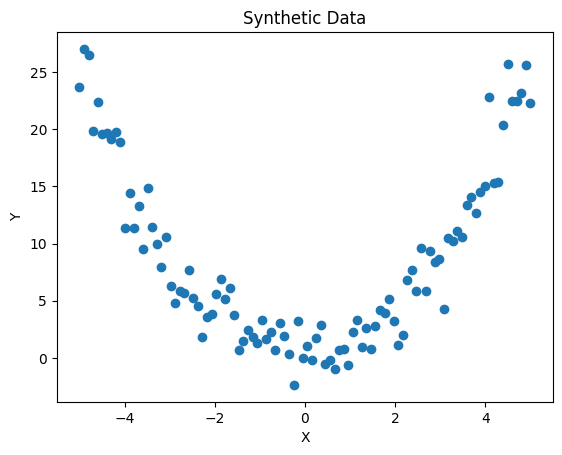

In [ ]:
# @title Generate synthetic data  { vertical-output: true }
X = np.linspace(-5, 5, 100).reshape(-1, 1)
Y = X ** 2 + np.random.randn(100, 1) * 2
plot = plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Synthetic Data")
plt.show()

In [ ]:
# @title Set Model architecture  - Hyperparameters (try different values)
#Note: Number of hidden layer fixed at 1
hidden_layer_size = 5
learning_rate = 0.001 #try 0.001
epochs = 1000

In [ ]:
# @title Initialize network parameters
# Define the neural network architecture
input_size = 1
output_size = 1

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_layer_size)
b1 = np.zeros((1, hidden_layer_size))
W2 = np.random.randn(hidden_layer_size, output_size)
b2 = np.zeros((1, output_size))

# Define the activation function (sigmoid)
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
  return x * (1 - x)


In [ ]:
# @title Backpropagation algorithm { vertical-output: true }
# Training loop
loss_history = []
predicted_output_history = []

# Training loop
for epoch in range(epochs):
  # Forward propagation
  hidden_layer_input = np.dot(X, W1) + b1 #x_2
  hidden_layer_output = sigmoid(hidden_layer_input) #x_3
  output_layer_input = np.dot(hidden_layer_output, W2) + b2 #x_4
  output_layer_output = output_layer_input # No activation for regression

  # Calculate the loss (mean squared error)
  loss = np.mean((Y - output_layer_output) ** 2)  # L =X5

  # Backpropagation

  # Using Symobolic differentiation to calculate gradients
  """
  d_output = -(Y - output_layer_output)  #  e_p
  dL_db2= np.sum(d_output, axis=0, keepdims=True)
  dL_dW2= np.dot(hidden_layer_output.T, d_output)
  dL_db1= np.sum(np.dot(d_output, W2.T) * sigmoid_derivative(hidden_layer_output), axis=0, keepdims=True)
  dL_dW1= np.dot(X.T, np.dot(d_output, W2.T) * sigmoid_derivative(hidden_layer_output))

  # Update weights and biases (Stochastic gradient descent update)
  W2 -= learning_rate * dL_dW2  #
  b2 -= learning_rate * dL_db2
  W1 -= learning_rate * dL_dW1
  b1 -= learning_rate * dL_db1
  """
  ## Using AutoDiff to calculate gradients
  dL_X4 = -(Y - output_layer_output)
  dL_W2 =np.dot(hidden_layer_output.T, dL_X4) # dL_theta3
  dL_x3 = np.dot(dL_X4, W2.T)
  dL_sigmoid=dL_x3                  #dL_theta2
  dL_x2=dL_sigmoid*sigmoid_derivative(hidden_layer_output)
  dL_W1=np.dot(X.T, dL_x2)

  W2 -= learning_rate * dL_W2 #np.dot(hidden_layer_output.T, d_output)#
  b2 -= learning_rate * np.sum(dL_X4, axis=0, keepdims=True)
  W1 -= learning_rate * dL_W1 # np.dot(X.T, d_hidden_layer)
  b1 -= learning_rate * np.sum(dL_x2, axis=0, keepdims=True)


  # Print the loss every 100 epochs
  #if epoch % 100 == 0:
    #print(f"Epoch {epoch}, Loss: {loss}")
   # Store predicted output for animation
  if epoch % 100 == 0:
    predicted_output_history.append(output_layer_output)


###########################################################################
#@title My Hidden Code Cell
from IPython.display import display, Markdown
display(Markdown(r"""
Repeat T epochs
1. **Forward Pass**
> $\mathcal{L}=f_4 \circ f_3 \circ f_2 \circ f_1$
 $(\mathbf{x}=\mathbf{x}_1)$
 $\mathbf{x}_2= f_1(\mathbf{x},W_1 )=\mathbf{W}_1\mathbf{x} +b_1$
 $\mathbf{x}_3= f_2(\mathbf{x_2},{φ})={φ}(\mathbf{x_2})$
 $\mathbf{x}_4= f_3(\mathbf{x_3},W_2 )=\mathbf{W}_2\mathbf{x}_3 + b_2$
$o=\mathcal{L} = f_4 (\mathbf{x_4},y)=\frac{1}{2}||y-x_4||_2^2 $
 2. **Compute Loss**
 $L = \frac{1}{2} \sum_{p=1}^P \left(y_p - \hat{y}_p \right)^2$
 3. **Calculate gradients (using Reversemode Automatic differentiation)**
  > $\frac{\partial \mathcal{L}}{\partial x_4} = \frac{\partial \mathcal{L}}{\partial x_4}$
  $\frac{\partial \mathcal{L}}{\partial W_2} = \frac{\partial \mathcal{L}}{\partial x_4} \frac{\partial x_4}{\partial W_2}$;
  $\frac{\partial \mathcal{L}}{\partial b_2} = \frac{\partial \mathcal{L}}{\partial x_4} \frac{\partial x_4}{\partial b_2}$
  $\frac{\partial \mathcal{L}}{\partial x_3}  = \frac{\partial \mathcal{L}}{\partial \theta_3} \frac{\partial \theta_3}{\partial x_3}$
  $ \frac{\partial \mathcal{L}}{\partial \sigma}  = \frac{\partial \mathcal{L}}{\partial x_3} \frac{\partial x_3}{\partial \sigma}$
  $\frac{\partial \mathcal{L}}{\partial x_2}  = \frac{\partial \mathcal{L}}{\partial \theta_2} \frac{\partial \theta_2}{\partial x_2} $
  $\frac{\partial \mathcal{L}}{\partial W1}
  = \frac{\partial \mathcal{L}}{\partial x_2}  \frac{\partial x_2}{\partial W1}$;
  $\frac{\partial \mathcal{L}}{\partial b1}
  = \frac{\partial \mathcal{L}}{\partial x_2}  \frac{\partial x_2}{\partial b1}$
  4. **Do SGD updates**
 $b = b - \mu  \frac{\partial E}{\partial b} $
 $ \mathbf{W}_{2} = \mathbf{W}_{2} - \mu  \frac{\partial E}{\partial \mathbf{W}_2}$
 $\mathbf{W}_{1} = \mathbf{W}_{1} - \mu  \frac{\partial E}{\partial \mathbf{W}_1}$
"""))



Repeat T epochs  
1. **Forward Pass**  
> $\mathcal{L}=f_4 \circ f_3 \circ f_2 \circ f_1$    
 $(\mathbf{x}=\mathbf{x}_1)$  
 $\mathbf{x}_2= f_1(\mathbf{x},W_1 )=\mathbf{W}_1\mathbf{x} +b_1$    
 $\mathbf{x}_3= f_2(\mathbf{x_2},{φ})={φ}(\mathbf{x_2})$  
 $\mathbf{x}_4= f_3(\mathbf{x_3},W_2 )=\mathbf{W}_2\mathbf{x}_3 + b_2$  
$o=\mathcal{L} = f_4 (\mathbf{x_4},y)=\frac{1}{2}||y-x_4||_2^2 $
 2. **Compute Loss**  
 $L = \frac{1}{2} \sum_{p=1}^P \left(y_p - \hat{y}_p \right)^2$
 3. **Calculate gradients (using Reversemode Automatic differentiation)**   
  > $\frac{\partial \mathcal{L}}{\partial x_4} = \frac{\partial \mathcal{L}}{\partial x_4}$   
  $\frac{\partial \mathcal{L}}{\partial W_2} = \frac{\partial \mathcal{L}}{\partial x_4} \frac{\partial x_4}{\partial W_2}$; 
  $\frac{\partial \mathcal{L}}{\partial b_2} = \frac{\partial \mathcal{L}}{\partial x_4} \frac{\partial x_4}{\partial b_2}$  
  $\frac{\partial \mathcal{L}}{\partial x_3}  = \frac{\partial \mathcal{L}}{\partial \theta_3} \frac{\partial \theta_3}{\partial x_3}$  
  $ \frac{\partial \mathcal{L}}{\partial \sigma}  = \frac{\partial \mathcal{L}}{\partial x_3} \frac{\partial x_3}{\partial \sigma}$   
  $\frac{\partial \mathcal{L}}{\partial x_2}  = \frac{\partial \mathcal{L}}{\partial \theta_2} \frac{\partial \theta_2}{\partial x_2} $     
  $\frac{\partial \mathcal{L}}{\partial W1}
  = \frac{\partial \mathcal{L}}{\partial x_2}  \frac{\partial x_2}{\partial W1}$;
  $\frac{\partial \mathcal{L}}{\partial b1}
  = \frac{\partial \mathcal{L}}{\partial x_2}  \frac{\partial x_2}{\partial b1}$  
  4. **Do SGD updates**     
 $b = b - \mu  \frac{\partial E}{\partial b} $  
 $ \mathbf{W}_{2} = \mathbf{W}_{2} - \mu  \frac{\partial E}{\partial \mathbf{W}_2}$    
 $\mathbf{W}_{1} = \mathbf{W}_{1} - \mu  \frac{\partial E}{\partial \mathbf{W}_1}$    


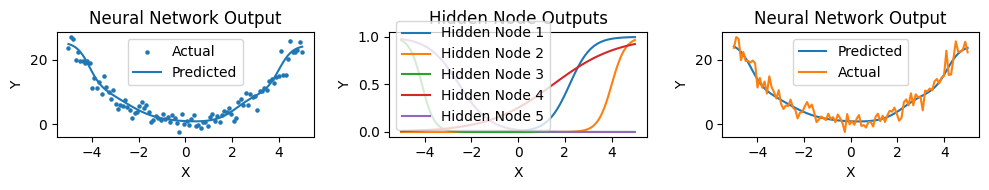

In [ ]:
# Plot the results
# Create subplots to arrange the graphs side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 2))


# Plot actual vs predicted in the first subplot
ax1.scatter(X, Y, label="Actual", s=5)
ax1.plot(X, output_layer_output, label="Predicted")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_title("Neural Network Output")
ax1.legend()

# Plot the output from each hidden node in the second subplot
for i in range(hidden_layer_size):
  ax2.plot(X, hidden_layer_output[:,i], label=f"Hidden Node {i+1}")

ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_title("Hidden Node Outputs")
ax2.legend()

#fig, ax = plt.subplots(figsize=(4, 4))
line_predicted, = ax3.plot(X, predicted_output_history[0], label="Predicted")
line_actual, = ax3.plot(X, Y, label="Actual")
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_title("Neural Network Output")
ax3.legend()

def animate(i):
  line_predicted.set_data(X, predicted_output_history[i])
  return line_predicted,

ani = FuncAnimation(fig, animate, frames=len(predicted_output_history), interval=1, blit=True)
plt.tight_layout()  # Adjust spacing between subplots
plt.show()
# Display the animation
HTML(ani.to_jshtml())